In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
train='/content/drive/My Drive/data/train'
test='/content/drive/My Drive/data/test'
valid='/content/drive/My Drive/data/validation'

In [0]:
model = Sequential()

model.add(Conv2D(input_shape=(512,384,3),filters=8,kernel_size=(5,5),strides=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.1)

model.add(Conv2D(filters=16,kernel_size=(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.1)

model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(512,384),
    batch_size=128,
    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [0]:
print(train_generator.class_indices)

{'biodegradable': 0, 'non_biodegradable': 1}


In [0]:
validation_generator = test_datagen.flow_from_directory(
    valid,
    target_size=(512,384),
    batch_size=128,
    class_mode='binary')

Found 400 images belonging to 2 classes.


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/25
30/30 [==============================] - 37s 1s/step - loss: 0.6451 - acc: 0.6501 - val_loss: 0.6578 - val_acc: 0.6417
Epoch 2/25
30/30 [==============================] - 31s 1s/step - loss: 0.4968 - acc: 0.7525 - val_loss: 0.5290 - val_acc: 0.6953
Epoch 3/25
30/30 [==============================] - 32s 1s/step - loss: 0.4328 - acc: 0.7839 - val_loss: 0.5035 - val_acc: 0.7484
Epoch 4/25
30/30 [==============================] - 36s 1s/step - loss: 0.3948 - acc: 0.8155 - val_loss: 0.4819 - val_acc: 0.7534
Epoch 5/25
30/30 [==============================] - 30s 987ms/step - loss: 0.3380 - acc: 0.8510 - val_loss: 0.4564 - val_acc: 0.7922
Epoch 6/25
30/30 [==============================] - 31s 1s/step - loss: 0.2896 - acc: 0.8746 - val_loss: 0.5078 - val_acc: 0.7649
Epoch 7/25
30/30 [==============================] - 35s 1s/step - loss: 0.2209 - acc: 0.9107 - val_loss: 0.4098 - val_acc: 0.8393
Epoch 8/25
30/30 [==============================] - 29s 963ms/step - loss: 0.2257 - acc

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 170, 127, 8)       608       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 85, 63, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 81, 59, 16)        3216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 40, 29, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 38, 27, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 19, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7904)             

In [0]:
loss_metrics = model.evaluate_generator(validation_generator)

In [0]:
print("Validation Accuracy: ",loss_metrics[1])
print("Validation Loss: ",loss_metrics[0])

Validation Accuracy:  0.8025
Validation Loss:  1.1119615936279297


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


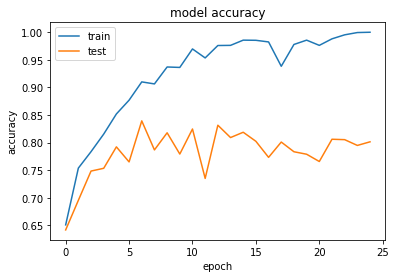

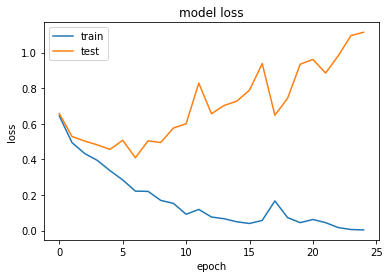

In [0]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(512,384),
    batch_size=128,
    class_mode='binary')

Found 18 images belonging to 2 classes.


In [0]:
classes = model.predict_generator(validation_generator)

In [0]:
print(len(classes))

400


Predicted:  biodegradable


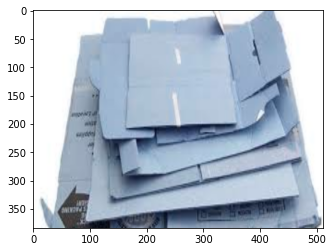

In [0]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/data/test/biodegradable/Biodegradable_v_4.png')
img = cv2.resize(img,(512, 384))
plt.imshow(img)
di = {0: 'biodegradable', 1:'non_biodegradable'}
y=model.predict(img.reshape(1, 512, 384, 3))

print('Predicted: ',di[y[0][0]])